In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Wavefunction

The analytical formula for a particle in a box is as follows:

$\psi(x) = \sqrt{\frac{2}{a}}sin(\frac{n\pi x}{a})$ 

$E_{n} = \frac{n^2 \hbar^2 \pi^2}{2ma^2}$

In [2]:
# Returns the analytical wavefunction to be found
def psi_sampler(n, a, x):  # a = boundary condition
    return np.sqrt((2/a)) * np.sin(n * np.pi * x / a)

# Return analytical solution of energy in units hbar ** 2 / m
def E_sampler(n, a):
    return (n**2 * np.pi ** 2) / (2 * a ** 2)

# Returns the analytical PDF to be found
def pdf_sampler(n, a, x):
    return (2/a) * np.sin(n * np.pi * x / a) ** 2

In [3]:
a = 100  # Boundary condition (size of well)
Xs = range(0,a)
psi_list = []
pdf_list = []

In [4]:
# Sample from true functions
n_psi = []
for n in range(1,20):  # Sample up to the 20th order wavefunction
    psi_list = []
    for x in Xs:
        psi = psi_sampler(n, a, x)
        psi_list.append(psi)
    n_psi.append(psi_list)

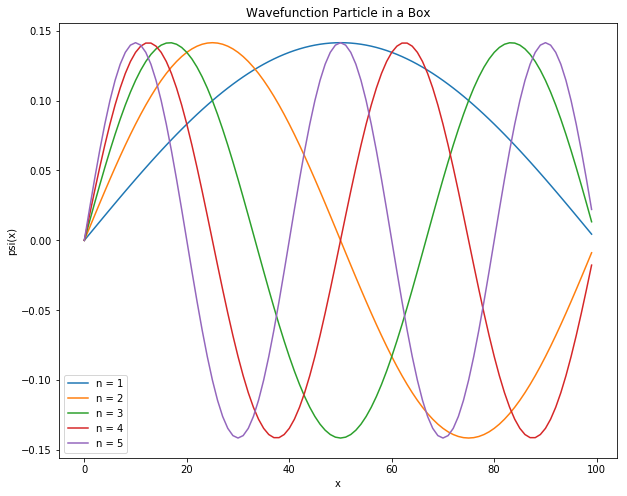

In [5]:
# Visualize multiple wavefunctions overlaid
fig=plt.figure(figsize=(10, 8))
for n in range(0,5):
    plt.plot(Xs, n_psi[n], label = 'n = {}'.format(n+1))
plt.legend()
plt.title('Wavefunction Particle in a Box')
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

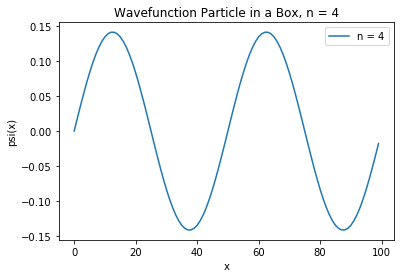

In [6]:
# Visualize just one wavefunction
n = 4
plt.plot(Xs, n_psi[n-1], label = 'n = {}'.format(n))
plt.legend()
plt.title('Wavefunction Particle in a Box, n = {}'.format(n))
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

## Probability Density Function

P(x) = $\lvert \psi (x) \rvert ^2$

In [7]:
# Sample from true functions
n_pdf = []
for n in range(1,20):  # Sample up to the 20th order wavefunction
    pdf_list = []
    for x in Xs:
        pdf = pdf_sampler(n, a, x)
        pdf_list.append(pdf)
    n_pdf.append(pdf_list)

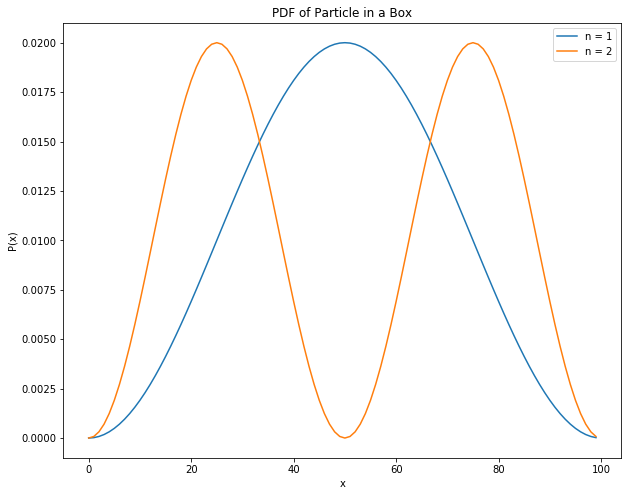

In [8]:
# Visualize multiple wavefunctions overlaid
fig=plt.figure(figsize=(10, 8))
for n in range(0,2):
    plt.plot(Xs, n_pdf[n], label = 'n = {}'.format(n+1))
plt.legend()
plt.title('PDF of Particle in a Box')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

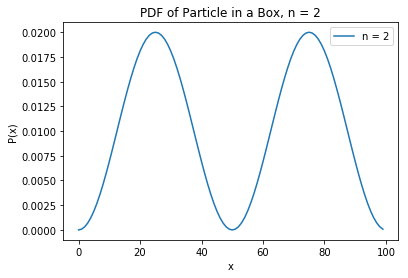

In [9]:
# Visualize just 1 PDF
n = 2
plt.plot(Xs, n_pdf[n-1], label = 'n = {}'.format(n))
plt.legend()
plt.title('PDF of Particle in a Box, n = {}'.format(n))
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

## Analytical: Energies of the Wavefunctions

$E_{n} = \frac{n^2 \hbar^2 \pi^2}{2ma^2}$

In [10]:
a = 100  # Boundary condition (size of well)
Xs = range(0,a)
e_list = []  # List of energies

In [11]:
# Sample from true functions
n_energy = []
for n in range(1,20):  # Sample up to the 20th order wavefunction
    e_list = []
    for x in Xs:
        e = E_sampler(n, a)
        e_list.append(e)
    n_energy.append(e_list)

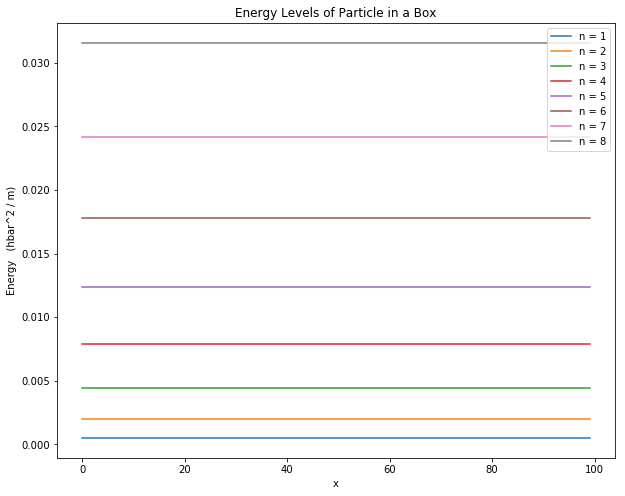

In [12]:
# Visualize energy levels overlaid
fig=plt.figure(figsize=(10, 8))
for n in range(0,8):
    plt.plot(Xs, n_energy[n], label = 'n = {}'.format(n+1))
plt.legend()
plt.title('Energy Levels of Particle in a Box')
plt.xlabel('x')
plt.ylabel('Energy   (hbar^2 / m)')
plt.show()

## Numerical: Hamiltonian Particle in a Box

$\hat{H} = \hat{K} + \hat{V}(x)$

$\hat{H} = \frac{-\hbar^2}{2m}[\frac{d^2}{dx^2}] + \hat{V}(x)$

### Total Energy

$\hat{H} \psi = E_{total} \psi$

$E_{total} = K + V$

### Kinetic Energy: Finite Difference Method

$\hat{K} \psi_{n}(x) = E_{k,n} \psi_{n}(x)$

$\frac{-\hbar^2}{2m}[\frac{d^2}{dx^2}] \psi_n(x) = E_{k,n} \psi_{n}(x)$

$\therefore E_{k,n} = \frac{-\hbar^2}{2m} \frac{\psi_n''(x)}{\psi_n (x)}$

$\psi ''(x)  = \frac{\psi(x_0 + \Delta x) - 2\psi(x_0) + \psi(x_0 - \Delta x)}{(\Delta x)^2}$

$\therefore E_k(x) =\frac{-\hbar^2}{2m} \frac{\psi(x_0 + \Delta x) - 2\psi(x_0) + \psi(x_0 - \Delta x)}{(\Delta x)^2} \frac{1}{\psi(x_{0})}$



In [13]:
def potential_energy(x, a):
    if x <= a and x >= 0:
        return 0
    else:
        return 1000000000000000  # Basically infinity

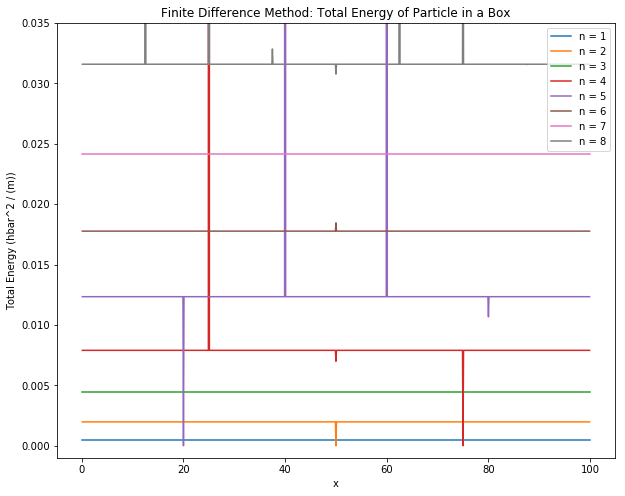

In [14]:
# Determine total energy for several states using finite difference methods
fig=plt.figure(figsize=(10, 8))

# Loop over all states
for n in range(1,9):
    x_list = []
    total_energy_list = []
    
    a = 100  # Boundary condition, potential well goes to infinity at a = 100
    dx = 0.1
    x = 0 + dx 


    # Get energy from x = 0 + dx to boundary condition, a -dx
    while x < a -dx:
        # Second derivative (central potential) divided by psi to get measurement of kinetic energy
        second_derivative = (psi_sampler(n, a, x + dx) - 2* psi_sampler(n, a, x) + psi_sampler(n, a, x - dx)) / (dx ** 2)
        k_en = - second_derivative / (2 * psi_sampler(n, a, x))  # Units hbar^2 / m
        v_en = potential_energy(x, a)
        total_energy_list.append(k_en + v_en)
        x_list.append(x)
        x += dx
    
    # Visualization
    plt.plot(x_list, total_energy_list, label = 'n = {}'.format(n))
plt.legend()
plt.title('Finite Difference Method: Total Energy of Particle in a Box')
plt.xlabel('x')
plt.ylabel('Total Energy (hbar^2 / (m))')
plt.ylim(-0.001,0.035)  # y-axis limits
plt.show()

The general shape is the same as the analytical result found earlier. However, there are extreme points in the graph, where the numerical method breaks down. These can be further illustrated by plotting the graph without any limts on the y-axis (i.e. removing the second last line of code in the above code block).

### Function that Maps from $\vec{S}$ to $x$ 

Here, we discuss a procedure that takes a state of multiple spins and returns a single value for x-position. 

RBMs take as input either values of 0 or 1. Therefore we use bytes to represent the x-position, so that these values can be accepted as input for the RBM. 

$|S> = |+, -, -, +>$ ....... state vector of spins

$\sigma_{0} = +1 , \sigma_{1} = -1 , \sigma_{2} = -1 , \sigma_{3} = +1$ ........ individual spins

$|B> = |1, 0, 0, 1>$ ....... convert spins into binary values, bytes

$b_{0} = 1, b_{1} = 0, b_{2} = 0, b_{3} = 1$   ....... individual bits from byte above


$x = \sum_{n=0}^{size(B)} 2^{n} b_{n}$  ..... returns a single, positive integer value for position by summing over the bits

In [15]:
# Input state vector of spins
s = [+1, -1, -1, +1]  
print('state = ', s)

state =  [1, -1, -1, 1]


In [16]:
# Convert spin into binary values, bytes
B = []
for sigma in s:
    B.append((sigma + 1) / 2)    
print('byte = ', B)

byte =  [1.0, 0.0, 0.0, 1.0]


In [17]:
# Return a single x-position from byte
x = 0
for n in range(len(B)):
    x += 2**n * int(B[n])
print('x = ', x)

x =  9


In [18]:
# Concisely written as a function
def s_to_x(s):
    B = []
    for sigma in s:
        B.append((sigma + 1) / 2)  
    x = 0
    for n in range(len(B)):
        x += 2**n * int(B[n])
    return(x)

In [19]:
s = [+1,-1,-1,-1,+1,+1]  # input state of spins
print(s_to_x(s))

49


### Mapping from $x$ to $\vec{S}$

Here I present a method that carries out the reverse, where a value for x-position is provided - and a corresponding state of spins is returned similarly.

In [20]:
# Input value of x-position
x = 9
print('x = ', x)

x =  9


In [21]:
# Finds nonzero bit locations in the byte
bit_locations = []
x_remaining = x

# Searches from the right most bit (largest) to the left most bit (smallest)
while x_remaining > 0:
    n = 0
    test = 0
    if 2 ** n == x_remaining:
        bit_locations.append(n)
        x_remaining -= 2**n
    else:
        while 2 ** n < x_remaining:
            n += 1
        n -= 1
        bit_locations.append(n)
        x_remaining -= 2**n
        
print(bit_locations)

[3, 0]


In [22]:
# Create empty byte of the correct size
byte = []
for b in range(bit_locations[0]+1):
    byte.append(0)  

# Place values of 1 at correct locations in the byte
for location in bit_locations:
    byte[location] = 1    
    
print(byte)

[1, 0, 0, 1]


In [23]:
# Convert byte into multiple spin states of values +1 or -1
s = []
for bit in byte:
    sigma = 2*bit - 1
    s.append(sigma)
print(s)

[1, -1, -1, 1]


Here is the above, more concisely written as a function

In [24]:
# Returns a state vector of +/-1 spins, s, given a value of x-position 
def x_to_s(x):
    # Finds nonzero bit locations in the byte
    bit_locations = []
    x_remaining = x
    # Searches from the right most bit (largest) to the left most bit (smallest)
    while x_remaining > 0:
        n = 0
        test = 0
        if 2 ** n == x_remaining:
            bit_locations.append(n)
            x_remaining -= 2**n
        else:
            while 2 ** n < x_remaining:
                n += 1
            n -= 1
            bit_locations.append(n)
            x_remaining -= 2**n
    # Create empty byte of the correct size
    byte = []
    for b in range(bit_locations[0]+1):
        byte.append(0)  
    # Place values of 1 at correct locations in the byte
    for location in bit_locations:
        byte[location] = 1    
    # Convert byte into multiple spin states of values +1 or -1
    s = []
    for bit in byte:
        sigma = 2*bit - 1
        s.append(sigma)
    return(s) 

In [25]:
x = 9
print(x_to_s(x))

[1, -1, -1, 1]


In [26]:
x = 23
print(x_to_s(x))

[1, 1, 1, -1, 1]
